<center> <h2> DS 3000 - Fall 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Identifying Splice Junctions Using Supervised Machine Learning</h3> </center>
<center><h4>Charles Crain, Zachary Dawson, Giona Kleinberg</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

Splice junction identification is an integral component of identifying disease-causing genetic variations and other important biomedical efforts. The goal of this project was to apply an optimal machine learning algorithm capable of classifying the type of splice-junction present within a genetic sequence. The raw data used contained over 3000 genetic sequences containing information on the nucleotide base at 60 sequential positions centered around each labeled junction.  The data was cleaned, preprocessed, visualized, and transformed using one-hot encoding. GC content was extracted as an additional feature and feature selection was then performed. Out of the supervised classification algorithms used, the Binomial Naive Bayes algorithm performed the best with a mean accuracy of 96.32%. A significant difference was found in GC content between the types of splice junctions using a Kruskal Wallis test (p<0.0001) and nucleotide bases at positions closer to the splice junction were found more important to the created model.

<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

### **What is the problem?**


In all living organisms, the DNA genetic code is first transcribed into messenger RNA (mRNA) transcripts which go on to direct protein synthesis. In eukaryotic organisms, the initial pre-mRNA transcripts consist of exons, which code for the protein, and introns, which are non-coding sequences. The exons must be spliced together to form the final mRNA transcript in order to direct protein synthesis. This splicing process involves stitching together the exons while removing the introns. 

 
Due to advances in genomics technology, the full genome sequences of many organisms are known. However, one of the challenges to accurately predicting proteins in eukaryotes is determining which sequences in genes are exons and introns; the solution to this challenge involves locating the junctions between exons and introns that the cell recognizes during splicing. There are many sequence and context-dependent factors that determine which parts of sequences are splice sites (De Conti, Baralle, & Buratti, 2013). **The aim of our project is to find an optimal machine learning model for predicting splice sites from DNA sequence.**



### **Why is it important?**


As mentioned above, splice site recognition is important to predicting the coding sequences of genes in humans and other eukaryotic organisms. Additionally, detecting splice sites is also crucial for predicting isoforms of genes, which are similar proteins formed from splicing together exons in different ways. It is estimated that 9-11% of rare genetic disorders involve cryptic splice sites, or mutations that introduce a splice site where there should not be one (Jaganathan et al., 2019). Thus, determination of splice site is important to identifying and characterizing disease-causing genetic variation. For all of these reasons, splice site prediction is an important biomedical goal which may benefit from the application of machine learning. We are very interested to learn if there is a strong enough relation between the nucleotide bases at each position in a genetic sequence and the type of splice junction present in that sequence.



 
### **Previous Works**


This problem has been previously studied in a machine learning context.  Meher, et al. (2019) tested the performance of five classification algorithms in combination with 8 nucleotide-encoding schemes. Their research found that, both in terms of accuracy and computational speed, the best performing classifier was a support vector machine. They found that SVM performed at >90% accuracy across multiple encoding schemes. The best performing encoding scheme was a nucleotide-specific encoder calleddi-nucleotide frequency difference between real & false splice sites (FDTF). Jaganathan, et al. (2019) developed a deep residual neural network to predict splice sites with 95% accuracy based on 10,000 nucleotides of adjacent sequence. 

 
 
### **Questions and Hypotheses**


There is a large magnitude of information that can be obtained through the use of machine learning. For this particular report, we set out to answer the following questions:


**Question 1:** What type of machine learning model will best be able to predict the type of boundary in a genetic sequence?

**Hypothesis:** The Support Vector Machine, Bernoulli Naive Bayes, and Multinomial Naive Bayes will perform the best out of the basic set of classification algorithms.

**Justification:** The Support Vector Machine algorithm is predicted to do well due to the high dimensions of the dataset. The Multinomial Naive Bayes algorithm is designed to handle data with discrete features which resonates well with our datasets' features which are primarily discrete nucleotide bases at given positions in a genetic sequence. The Bernoulli Naive Bayes is also predicted to perform well as we plan to one-hot encode our nucleotide base features into discrete, binary features which the Bernoulli Naive Bayes model is adept at handling.


**Question 2:** Is there a significant difference in GC content between the different types of splice junctions?

**Hypothesis:** There is a significant difference in GC content between the different types of splice junctions.

**Justification:** GC content provides valuable insight into the genetic contents of a given sequence so it makes sense that the type of junction within a genetic sequence will affect the GC content. Genes typically have a higher GC content than non-encoding regions of the genome so since splice junctions are contained within genes, their GC content will likely differ especially from non-splice junctions.


**Question 3:** Where are the most important locations within a genetic sequence in predicting the type of splice junction present within that sequence?

**Hypothesis:** The most important positions will be centered around the the location of the junction.

**Justification:** The nucleotide bases in positions closer to the center of the junction will likely have a greater impact in determining the type of splice junction and will therefore likely be very influential as features of a machine learning model.



### **References**




De Conti, L., Baralle, M., & Buratti, E. (2013). Exon and intron definition in pre-mRNA splicing. Wiley Interdiscip Rev RNA, 4(1), 49-60. doi:10.1002/wrna.1140 

Jaganathan, K., Kyriazopoulou Panagiotopoulou, S., McRae, J. F., Darbandi, S. F., Knowles, D., Li, Y. I., . . . Farh, K. K.-H. (2019). Predicting Splicing from Primary Sequence with Deep Learning. Cell, 176(3), 535-548.e524. doi:https://doi.org/10.1016/j.cell.2018.12.015 

Meher, P. K., Sahu, T. K., Gahoi, S., Satpathy, S., & Rao, A. R. (2019). Evaluating the performance of sequence encoding schemes and machine learning methods for splice sites recognition. Gene, 705, 113-126. doi:https://doi.org/10.1016/j.gene.2019.04.047 


<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

Our data was obtained from openML which is an online dataset repository containing datasets that can be analyzed via machine learning. The link to the page with the original dataset is https://www.openml.org/d/46. The sequences of the dataset were originally found in GenBank 64.1 and were donated by G. Towell, M. Noordewier, and J. Shavlik to openML to be analyzed using machine learning. The data was read into JupyterLab from GitHub.
    
Our dataset represents a set of sequences taken from primates originally from GenBank 64.1. There are 3,190 rows each representing a genetic sequence that can be classified by the target variable. Each of the 60 features of the dataset represent the nucleotide base at a position in the sequence. The first 30 positions are before the predicted splice junction and the next 30 positions are after the predicted splice junction. The nucleotide base is either A, C, T, G, and the could also be classified as D, N, S, R. If the positional value is D, the nucleotide base is either A, G, or T. If the positional value is N, the base could be A, C, T, or G. If the positional value is S, the nucleotide base is either C or G. If the positional value is R, the nucleotide base is either A or G. The target variable is the classification of the sequence into one that has an Exon/Intron Boundary (EI), an Intron/Exon Boundary (IE) or a non-splice junction (N). 
    
The first code block loads in the raw data from GitHub


In [1]:
import pandas as pd # import pandas

url = 'https://raw.githubusercontent.com/dawsonz17/DS300project/master/data.csv' # url to github raw csv
df = pd.read_csv(url, index_col=0) # reads online csv from github into a pandas dataframe
df.head(5) # displays head of dataframe

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
Instance_name,,,,,,,,,,,,,,,,,,,,,
ATRINS-DONOR-521,C,C,A,G,C,T,G,C,A,T,...,G,C,C,A,G,T,C,T,G,EI
ATRINS-DONOR-905,A,G,A,C,C,C,G,C,C,G,...,T,G,C,C,C,C,C,G,C,EI
BABAPOE-DONOR-30,G,A,G,G,T,G,A,A,G,G,...,A,C,G,G,G,G,A,T,G,EI
BABAPOE-DONOR-867,G,G,G,C,T,G,C,G,T,T,...,G,T,T,T,T,C,C,C,C,EI
BABAPOE-DONOR-2817,G,C,T,C,A,G,C,C,C,C,...,C,T,T,G,A,C,C,C,T,EI


### 2.2. Data Analysis

   For the first hypothesis, the independent variable is the the type of machine learning model, and the dependent variable is the model's performance (accuracy score). For the second hypothesis, the independent variable is the type of slice junction (our target variable) and the dependent variable is the GC content of the genetic sequences. For the third hypothesis, the independent variable is the position features in the genetic sequence, and the dependent variable is the importance of the feature to creating a supervised classification model (measured discretely as important or not using univariate feature selection).


   **The goal of the predictive model is to predict the type of splice-junction (target variable) from the nucleotide bases at 60 different positions across a genetic sequence as well as the GC content of the sequence (feature variables).** These features were chosen as they provide information regarding the building blocks of a splice-junction (nucleotide bases) as well as patterns in their order and quantity. Due to the close association of the feature variables and target variable, these features should provide a relaible foundation for predicting the target variable.


   This problem is a supervised machine leaning problem as a model is being trained using labeled data. By providing a complementary training set and validation set to the chosen algorithms, machine learning will allow the creation of a model that can label unlabeled data in a testing set or additional data obtained in the future. **The sub-category of supervised machine learning that our task falls into is multiclass classification** as our target variable is discrete and there are three possible classes for each item to be labeled as.


   The machine learning algorithms used are k-Nearest Neighbors, Support Vector Machine, Guassian Naive Bayes, Decision Tree, Binomial Naive Bayes, and Multinomial Naive Bayes. The support vector machine algorithm was chosen due to its strength as an algorithm to predict high dimensional data. The Multinomial Naive Bayes algorithm was chosen since it is optimized for discrete datasets such as ours. The Binomial Naive Bayes algorithm was chosen for a similar reason as the algorithm performs well on discrete data and more specifically binary data. While the majority of our features are not binary (A, C, T, or G), they will likely function similar to binary features once one-hot-encoding is used. Due to this reason, the Binomial Naive Bayes was included. The other used algorithms, including the K-Nearest Neighbors, Gaussian Naive Bayes, and Decision Tree algorithms were not as suited for our dataset however were included as well due to the low computational cost of doing so. Finding the algorithm with the best performance was prioritized over the neglible computational cost of testing these additional algorithms even though the chance of their success was relatively lower than the other algorithms.


<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling

#### Feature Variable Isolation
This code block isolates the features from the imported dataset. This is necessary in order to manage the features throughout the rest of the process. The output for this cell is the head of the feature dataframe

In [2]:
features = df.drop('Class', axis=1).reset_index(drop=True) # isolate features
features.head(5) # show head of features

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
0,C,C,A,G,C,T,G,C,A,T,...,A,G,C,C,A,G,T,C,T,G
1,A,G,A,C,C,C,G,C,C,G,...,G,T,G,C,C,C,C,C,G,C
2,G,A,G,G,T,G,A,A,G,G,...,C,A,C,G,G,G,G,A,T,G
3,G,G,G,C,T,G,C,G,T,T,...,G,G,T,T,T,T,C,C,C,C
4,G,C,T,C,A,G,C,C,C,C,...,C,C,T,T,G,A,C,C,C,T


#### Target Variable Isolation

The next code block isolates the target variable from the imported dataset. Similar to the feature isolation, it is necessarry to wrangle the target variable in order to have access to it in later steps. The output for this cell is the head of the target dataframe

In [3]:
target = df['Class'].reset_index(drop=True) # isolate target
target.head(5) # shows head of dataframe 

0    EI
1    EI
2    EI
3    EI
4    EI
Name: Class, dtype: object

#### Transforming Features - One-Hot Encoding of Feature Variables

This code block encodes all 60 features of the dataset using One-Hot-Encoding. This is necessary because the first 60 features of the dataset are discrete categorical values that cannot be used by machine learning models and need to be transformed into quantitative variables. The output for this cell is the head of the updated features dataframe resulting from One-Hot-Encoding. It can be seen that this step greatly increases the number of features.

In [4]:
from sklearn.preprocessing import OneHotEncoder # import one hot encoding

encoder = OneHotEncoder(sparse = False) # create encoder
encoded_f = encoder.fit_transform(features) # get encoded features
features_encoded = pd.DataFrame(encoded_f, columns= encoder.get_feature_names()) # puts encoded features into a dataframe
features_encoded.head(5) # shows head of dataframe

,x0_A,x0_C,x0_D,x0_G,x0_T,x1_A,x1_C,x1_D,x1_G,x1_T,...,x58_A,x58_C,x58_G,x58_N,x58_T,x59_A,x59_C,x59_G,x59_N,x59_T
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


####  Data Cleaning

The next code block replaces the target variable's values with numbers instead of strings/characters to clean up the data further. Cleaning the data by replacing the current values with numbers allows the machine learning algorithms to better use the target variable. The output for this cell is the head of the updated target dataframe

In [5]:
targetvars = {'EI': 0, 'IE': 1, 'N': 2} # create dictionary for target variable
target = target.replace(targetvars) # replace target variables with numerical equivalents
target.head(5) # show head

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

#### Feature Extraction of GC Content - Preprocess (Normalize Feature)

The following code block allows us to perform feature extraction on our data to find the GC content of each row (sequence). GC content is a useful metric to quantify the nucleotide base content of a genetic sequence and is predicted to also be helpful in classifying the type of splice-junction present in a genetic sequence. GC content is simply the ratio of G and C nucleotide bases to other bases in a sequence and provides information on the contents of the sequence. Other, similar metrics such as AT content are not calculated (and rarely are in similar problems) as they provide no additional information since knowing the G and C content of a gentic sequence provides the AT content (AT content = 1-GC content) The output for this cell shows the head of the updated features dataframe with GC content. GC Content is normalized to an 0-100% scale.

In [6]:
counts = features.apply(pd.Series.value_counts, axis=1)[['C', 'G', 'S']] # get count of C, and G, and S (since S is C or G)
# D, N, R are not included since we cannot be sure it's G or C.

counts = counts.fillna(0) # gets rid of Null values since if there is no G or C, the gc content is 0
counts['gccontent'] = (counts['C'] + counts['G']) / 60  # get gccontent and normalize
featurese = pd.concat((features_encoded, counts['gccontent']), axis=1) # add gccontent to features
featurese.head(5) # show head of features

,x0_A,x0_C,x0_D,x0_G,x0_T,x1_A,x1_C,x1_D,x1_G,x1_T,...,x58_C,x58_G,x58_N,x58_T,x59_A,x59_C,x59_G,x59_N,x59_T,gccontent
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.633333
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.800000
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.683333
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.650000
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667


#### Feature Selection

The next code block allows feature selection of our feature variables. Univariate feature selection is used to select the most significant features in order to create a model with the best results. The value for k of the number of features to select was found by hypertuning the parameter. This was necessary to ensure significant features were not eliminated while insignificant features were eliminated and unable to adversely affect the models' performance. The list of selected features used to create our model is output by this cell. A pattern can already be noticed in the features that are the most significant. The chosen features represent the nucleotide bases very close to the center of each genetic sequence. GC content was also selected in this process.

In [7]:
from sklearn.feature_selection import f_classif # import feature selection for classification
from sklearn.feature_selection import SelectKBest # import feature selection
from sklearn.model_selection import train_test_split # import train test split

X_train, X_test, y_train, y_test = train_test_split(featurese, target, random_state=3000) # split dataset
select = SelectKBest(score_func=f_classif, k=66) # create selector
select.fit(X_train, y_train) # fit selector to training set
features_selected = select.transform(featurese) # transform features dataframe to features kept
X_train_selected = select.transform(X_train) # transform training set
X_test_selected = select.transform(X_test) # transform testing set
selected_feature_list = featurese.columns[select.get_support()] # variable containing features used
selected_feature_list # outputs features used

C:\Users\giona\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [78] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\giona\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Index(['x8_G', 'x9_G', 'x15_A', 'x15_T', 'x16_A', 'x16_T', 'x17_A', 'x17_G',
       'x17_T', 'x18_A', 'x18_G', 'x18_T', 'x19_A', 'x19_T', 'x20_A', 'x20_G',
       'x20_T', 'x21_A', 'x21_G', 'x21_T', 'x22_A', 'x22_C', 'x22_G', 'x22_T',
       'x23_A', 'x23_C', 'x23_G', 'x24_A', 'x24_C', 'x24_G', 'x24_T', 'x25_A',
       'x25_G', 'x25_T', 'x27_A', 'x27_C', 'x27_G', 'x28_A', 'x28_C', 'x28_G',
       'x28_T', 'x29_A', 'x29_C', 'x29_G', 'x29_T', 'x30_A', 'x30_C', 'x30_G',
       'x30_T', 'x31_A', 'x31_C', 'x31_G', 'x31_T', 'x32_A', 'x32_C', 'x32_G',
       'x32_T', 'x33_A', 'x33_C', 'x33_T', 'x34_A', 'x34_C', 'x34_G', 'x34_T',
       'x35_T', 'gccontent'],
      dtype='object')

### 3.2. Data Exploration

#### Figure 1 - Stacked Bar Chart of Nucleotide Frequencies

For our first plot, we created a stacked bar chart to visualize the nucleotide frequencies at each position in the sequences. ‘0’ is not a real position, but instead demarcates the center of the sequence. Positions -30 to -1 are the 30 nucleotides anterior to the splice site, whereas positions 1 to 30 are the 30 nucleotides posterior to the splice site.

Most positions have relatively uniform distributions of the four nucleotide bases, but certain bases are overrepresented at the positions closest to the splice site. In particular, the nucleotide G is particularly prevalent at the -1 and +1 positions. This points to unique nucleotide patterns close to the hypothesized splice site. These patterns are likely to be recognized by a machine learning model to predict sequence type.

In [8]:
import matplotlib.pyplot as plt #import matplotlib pyplot

base_counts = features.replace(['D', 'N', 'R', 'S'], 'ambig').apply(pd.Series.value_counts).fillna(0) # categorize all ambigous positions into one
positions = list(range(-30,0)) + list(range(1, 31)) # get range of positions 
plt.bar(positions, base_counts.loc['A'], color = 'blue', width=1) # a stacked bar
plt.bar(positions, base_counts.loc['T'], color = 'gold', bottom = base_counts.loc['A'], width=1) # t stacked bar
plt.bar(positions, base_counts.loc['C'], color = 'red', bottom= base_counts.loc['A'] + base_counts.loc['T'], width=1) # c stacked bar
plt.bar(positions, base_counts.loc['G'], color = 'green',bottom=base_counts.loc['A'] + base_counts.loc['T'] + base_counts.loc['C'], width=1) # g stacked bar
plt.bar(positions, base_counts.loc['ambig'], color = 'grey', bottom= base_counts.loc['A'] + base_counts.loc['T'] + base_counts.loc['C'] + base_counts.loc['G'], width=1) # ambig bar
plt.xlabel('Position') # add x label
plt.ylabel('Frequency') # add y label
plt.legend(['A', 'C', 'T', 'G', 'Ambig.']) # add legend
plt.close() # shows just the embedded figure

![Stacked Bar](https://github.com/dawsonz17/DS300project/raw/master/stacked_bar.png)

#### Figure 2 - 3 Pie Charts of Nucleotide Base Content in each Type of Splice Junction

This figure calculates the percentage of each base across the classes of the data (IE, EI, N). It displays all of this information in a pie chart for each class that shows the percentage of A, T, C, G, and Undetermined across all members of that class. The pie charts shows a slight increase in GC content for Extron/Intron splices which is promissing for our hypothesis 2.

In [9]:
def calc_percent_basepair(text, letter): # function to get percent of a basepair
    freq = text.count(letter) # gets frequency of each
    percent = float(freq) / float(len(text)) # gets percent
    return percent # returns percent

In [10]:
# Concatenate all reads for each sample and group by class (IE, EI, N)
concatenated_reads = pd.DataFrame({'sum': df.sum(axis=1), 'Class': df['Class']}).groupby('Class')

percentage = {}
for name, group in concatenated_reads: # Iterate trhough groups to find percentage of each BasePair
    all_reads = group.sum()['sum'] # Concatenate all reads for each group
    total_percent = 0 # initialize variable
    class_dict = {} # initialize dictionary
    for base in ['A', 'T', 'C', 'G']: # iterate through each basepair
        percent = calc_percent_basepair(all_reads, base) # calculate percentage of basepair
        class_dict.update({base: percent}) # update dictionary
        total_percent += percent # update total percent
    
    class_dict.update({'Undetermined': 1 - total_percent}) # calculate undetermined percentage
    percentage.update({name: class_dict}) # update percentage
    

final_df = pd.DataFrame.from_dict(percentage) # create dataframe from read percentages
final_df # show dataframe

,EI,IE,N
A,0.214388,0.199135,0.245753
T,0.210687,0.255922,0.238750
C,0.237688,0.296014,0.246664
G,0.304012,0.216608,0.252330
Undetermined,0.033225,0.032321,0.016502


In [11]:
#create plots

#Extron/Intron
final_df.plot(kind='pie', y='EI', figsize=(5, 5), colors = ['blue', 'gold', 'red', 'green', 'grey'])
plt.title('Exon/Intron') # add title
plt.legend(loc="lower right",
           borderaxespad=0.1,
           bbox_to_anchor=(1.3, 0.6)) # move legend off the plot
plt.close() # shows just the embedded figure

#Intron/Extrong
final_df.plot.pie(y='IE', figsize=(5, 5), colors = ['blue', 'gold', 'red', 'green', 'grey']) # create plot
plt.title('Intron/Exon') # add title
plt.legend(loc="lower right",
           borderaxespad=0.1,
           bbox_to_anchor=(1.3, 0.6)) # move legend off the plot
plt.close() # shows just the embedded figure

#Non-splice
final_df.plot.pie(y='N', figsize=(5, 5), colors = ['blue', 'gold', 'red', 'green', 'grey']) # create plot
plt.title('Non-splice') # add title
plt.legend(loc="lower right",
           borderaxespad=0.1,
           bbox_to_anchor=(1.3, 0.6)) # move legend off the plot
plt.close() # shows just the embedded figure

![Pie 1](https://github.com/dawsonz17/DS300project/raw/master/pie1.png)
![Pie 2](https://github.com/dawsonz17/DS300project/raw/master/pie2.png)
![Pie 3](https://github.com/dawsonz17/DS300project/raw/master/pie3.png)

#### Figure 3 - Distribution of Selected Position Features around Splice Junction

Figure 3 displays which positions were selected from using univariate feature selection. It also shows which base of the given position it chose based off the colors in the bar for that position. This figure indicates what are likely the important positions for deciding class of splice junction. 


This plot provides a visual showcasing that the most important positions to classifying a splice junction are centered roughly around the middle of the sequence. It shows that the -11 to 8 position range are all relatively more important which is skewed slightly left of the middle of the read. It also hints that A and T are more important than C and G when deciding for a specific position.

In [12]:
import plotly.express as px
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

features = df.drop('Class', axis=1).reset_index(drop=True) # isolate un-hot encoded features
included = [[False] * 4] * len(features) # keep track of each attribute
base_included = pd.DataFrame(columns =['A', 'T', 'C', 'G'])
base_included
for attribute in features.columns: # for each attribute
    index = int(attribute.strip('attribute_')) - 1 # 'attribute_x' -> x - 1
    selected_bases = [0,0,0,0]
    all_bases = ['x%d_A'%index, 'x%d_T'%index, 'x%d_C'%index, 'x%d_G'%index]
    for i, single_base in enumerate(all_bases): # check if any one of this index's bases was included in feature selection
        if single_base in selected_feature_list:
            selected_bases[i] = 1
    base_included = base_included.append({'A' : selected_bases[0], 'T' : selected_bases[1], 'C' : selected_bases[2], 'G' : selected_bases[3]}, ignore_index = True) 
            

colors = ['blue', 'gold', 'red', 'green'] # color list
positions = list(range(-26,0)) + list(range(0, 30)) # isolate positions
plt.figure(figsize=(10,7)) # create fig size
for read_position, graph_position in zip(range(60), positions): # dataframe and graph have different indices (-30,30) instead of 0(0-60)
    height = 0
    for i, base in enumerate(['A', 'T', 'C', 'G']): # for each base
        if base_included.iloc[read_position, i]: # if base is included in the selected features
            plt.bar(graph_position, 1, color = colors[i], bottom = height, width=1, label=base) # add one one height bar per base used with corresponding color
            height += 1
    plt.bar(-30, 1, color = 'white', bottom = height, width=1, label=base) # expand to fix range with invisible bar
    plt.bar(30, 1, color = 'white', bottom = height, width=1, label=base) # expand to fix range with invisible bar
plt.xlabel('Sequence Position') # add x label
plt.ylabel('Frequency') # add y label
blue_patch = mpatches.Patch(color='blue', label='A') # add blue patch
yellow_patch = mpatches.Patch(color='yellow', label='T') # add yellow batch
red_patch = mpatches.Patch(color='red', label='C') # add red patch
green_patch = mpatches.Patch(color='green', label='G') # add green patch
plt.legend(handles=[blue_patch, yellow_patch, red_patch, green_patch], loc="upper right") # create custome legend
plt.close() # shows just the embedded figure

![Stacked Bar](https://github.com/dawsonz17/DS300project/raw/master/binary_bar_chart.png)

### 3.3. Model Construction

Note: Testing of the first and third hypothesis are found in other sections, organized by the most optimal way to test them.

#### Hypothesis Testing for Hypothesis 2

First we check the assumptions required to run an ANOVA. We use a Shapiro test to test the normality of each category, as well as a Levene test to test for homogeneity of variances amongst the categories. All tests are statistically significant, so the assumptions are not met to run a standard ANOVA.

In [13]:
from scipy import stats # import stats

target_gc = pd.concat((target, counts['gccontent']), axis=1) # concat gc content
gc_ei = target_gc[target_gc['Class'] == 0]['gccontent'] # isolate exon/intron gc content
gc_ie = target_gc[target_gc['Class'] == 1]['gccontent'] # isolate intron/exon gc content
gc_n = target_gc[target_gc['Class'] == 2]['gccontent'] # isolate non-splice gc content

# Check assumptions of normality and homogeneity of variances
levene_results = stats.levene(gc_ei, gc_ie, gc_n) # run levene
shapiro_ei = stats.shapiro(gc_ei) # shapiro for exon/intron
shapiro_ie = stats.shapiro(gc_ie) # shapiro for intron/exon
shapiro_n = stats.shapiro(gc_n) # shapiro for non-splice
print(levene_results) # print levene results
print(shapiro_ei) # print shapiro for exon/intron
print(shapiro_ie) # print shapiro for intron/exon 
print(shapiro_n) # print shapiro for non-splice

LeveneResult(statistic=9.704619548316602, pvalue=6.28230952133715e-05)
ShapiroResult(statistic=0.9692525863647461, pvalue=1.2738653014376933e-11)
ShapiroResult(statistic=0.9704548716545105, pvalue=2.413696499614648e-11)
ShapiroResult(statistic=0.9960957765579224, pvalue=0.0002952643553726375)


Since the assumptions are not met to run a standard ANOVA, we instead use a non-parametric Kruskal-Wallis test. The Kruskal-Wallis test returns a significant result, so we follow it with a non-parametric Dunn’s test for post hoc comparisons. The post-hoc comparisons real each category is significantly different from the other two.

In [14]:
# All Shapiro tests and the Levene test were statistically significant
# Assumptions of normality and equality of variances NOT met
# Use Kruskal-Wallis non-parametric ANOVA instead
from scikit_posthocs import posthoc_dunn # import post hoc tests

kruskal_results = stats.kruskal(gc_ei, gc_ie, gc_n) # run Kruskal-Wallis test
print(kruskal_results) # print results
# Statistically significant
# Use Dunn non-parametric post-hoc tests
dunn_result = posthoc_dunn(target_gc, val_col='gccontent', group_col='Class') # pot hoc test
dunn_result = dunn_result.rename({0:'EI', 1: 'IE', 2: 'N'}) # reformat results
dunn_result = dunn_result.rename({0:'EI', 1: 'IE', 2: 'N'}, axis=1) # reformat results on other axis
dunn_result # show results of post hoc tests

KruskalResult(statistic=112.01838914715542, pvalue=4.737136083325475e-25)


,EI,IE,N
EI,1.000000e+00,6.005014e-07,9.625740e-26
IE,6.005014e-07,1.000000e+00,3.176927e-06
N,9.625740e-26,3.176927e-06,1.000000e+00


Since we know the GC-content is significantly different between the categories, we calculate the median GC-content of each sequence type to figure out which has the highest and lowest GC-content. We use the median instead of the mean since non-parametric tests compare group medians.

In [15]:
# All categories are different from each other
# Finding the median of each class to compare
import numpy as np # import numpy

ei_med = np.median(gc_ei) # calculate median of exon/intron
ie_med = np.median(gc_ie) # calculate median of intron/exon
n_med = np.median(gc_n) # calculate median of non-splice
print("Exon/Intron Median GC content: ", ei_med) # print median gc content for exon/intron
print("Intron/Exon Median GC content: ", ie_med) # print median gc content for intron/exon
print("Non-Splice Median GC content: ", n_med) # print median gc content for non-splice 

Exon/Intron Median GC content:  0.5833333333333334
Intron/Exon Median GC content:  0.55
Non-Splice Median GC content:  0.5166666666666667


#### Model Construction and Initial Accuracies

The following code block creates a list of all the machine learning algorithms we test and iteratively runs cross validation on all of them. The output for this cell is the mean accuracy and standard deviation of each model. The cross-fold validation uses k=10 splits.

In [16]:
from sklearn.neighbors import KNeighborsClassifier # import k-nearest neighbors
from sklearn.svm import LinearSVC # import svm
from sklearn.naive_bayes import GaussianNB # import gaussian naive_bayes
from sklearn.tree import DecisionTreeClassifier # import decision tree classifier
from sklearn.naive_bayes import BernoulliNB # import Bernoulli NB
from sklearn.naive_bayes import MultinomialNB # import multinomial naive bayes
from sklearn.model_selection import KFold # import k-fold
from sklearn.model_selection import cross_val_score # import cross validation scores

# dictionary of machine learning algorithms (no hyperparameters tuned)
estimatorsi={'K-Nearest Neighbor': KNeighborsClassifier(), # k-nearest neighbors
            'Support Vector Machine': LinearSVC(max_iter=1000000), # svm
            'Gaussian Naive Bayes': GaussianNB(), # gaussian naive_bayes
            'Decision Tree': DecisionTreeClassifier(), #decision tree classifier
            'Bernoulli Naive Bayes': BernoulliNB(), # bernoulli naive bayes
            'Multinomial Naive Bayes': MultinomialNB()} # multinomial naive bayes

def runkfold(estimators): # runs cross fold validation on a dictionary of models
    for cmodel in estimators: # for each model     
        kfold = KFold(n_splits=10, random_state=3000, shuffle=True) # setup KFold
        scores = cross_val_score(estimator=estimators[cmodel], X=X_train_selected, y=y_train, cv=kfold) # calculate scores
        print(cmodel + ":") # print model name
        print(f'\tMean Accuracy: {scores.mean():.2%}') # print mean accuracy
        print(f'\tStandard Deviation: {scores.std():.2%}') # print standard deviation

runkfold(estimatorsi) # find initial accuracies before hyper parameter tuning

K-Nearest Neighbor:
	Mean Accuracy: 84.24%
	Standard Deviation: 1.93%
Support Vector Machine:
	Mean Accuracy: 96.15%
	Standard Deviation: 0.59%
Gaussian Naive Bayes:
	Mean Accuracy: 92.64%
	Standard Deviation: 1.70%
Decision Tree:
	Mean Accuracy: 93.19%
	Standard Deviation: 1.46%
Bernoulli Naive Bayes:
	Mean Accuracy: 96.20%
	Standard Deviation: 0.84%
Multinomial Naive Bayes:
	Mean Accuracy: 96.07%
	Standard Deviation: 0.82%


### 3.4. Model Optimization

Note: The order of the model optimization section and the model evaluation section was switched in order to create a cohesive report. Cells appear in the order they should, and were, run. 

#### Grid Search with Cross-Fold Validation

The following code block runs grid search with cross validation on all 6 models in order to find the best hyperparameters for each model. This is done in order to ensure the most optimal model is used to minimize loss. Ensuring the best model is used reduces the risk of overfitting or underfitting a model and informs which hyperparameters should be used in the best model. In order to iterate through all the models, a dictionary of dictionaries is created to hold all the possible arguments for all relevant parameters for all models. The code block then outputs the best cross validation score obtained for each model through grid search with cross validation and also displays which hyperparameters were used to achieve that score.

In [17]:
from sklearn.model_selection import GridSearchCV # import grid search with cross validation

# dictionary of all models and their respective dictionaries of possible hyperparameters to be tuned by grid search
param_grid = {'K-Nearest Neighbor': {'n_neighbors': [1, 2, 3, 5, 9], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}, # k-nearest neighbor
              'Support Vector Machine': {'C': [10, 1, 0.1, 0.01, 0.001, 0.0001], 'max_iter': [10000, 100000, 1000000]}, #SVM
              'Gaussian Naive Bayes': {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7]}, # gaussian naive bayes
              'Decision Tree': {'max_depth': [1, 5, 10, 15, 20, 25, 30]}, # decision tree
              'Bernoulli Naive Bayes': {'alpha': [10, 1, 0.1, 0.01, 0.001, 0.0001]}, # bernoulli naive bayes
              'Multinomial Naive Bayes': {'alpha': [10, 1, 0.1, 0.01, 0.001, 0.0001]}} # multinomial naive bayes


for model in estimatorsi: # for each model
    grid_search = GridSearchCV(estimatorsi[model], param_grid[model], cv=5) # find the best hyper parameters
    grid_search.fit(X=X_train_selected, y=y_train) # find best hyper parameters

    print("\n", model) # print model name
    print("Best Parameters: ", grid_search.best_params_) # print best parameters (for use in next step)
    print("Best cross-validation score: ", grid_search.best_score_) # print best cross-val score


 K-Nearest Neighbor
Best Parameters:  {'algorithm': 'ball_tree', 'n_neighbors': 9}
Best cross-validation score:  0.8465736672460931

 Support Vector Machine
Best Parameters:  {'C': 10, 'max_iter': 10000}
Best cross-validation score:  0.9598649557568505

 Gaussian Naive Bayes
Best Parameters:  {'var_smoothing': 1e-07}
Best cross-validation score:  0.9276770817864973

 Decision Tree
Best Parameters:  {'max_depth': 5}
Best cross-validation score:  0.9372882836453209

 Bernoulli Naive Bayes
Best Parameters:  {'alpha': 0.1}
Best cross-validation score:  0.9632122360915785

 Multinomial Naive Bayes
Best Parameters:  {'alpha': 0.1}
Best cross-validation score:  0.9627929525423433


### 3.5. Model Evaluation

#### Hypothesis Test Results for Hypothesis 2

In the previous seciton, a Kruskal-Wallis non-parametric ANOVA was conducted to compare the GC-content among splice donors (exon-intron junctions), splice acceptors (intron-exon junctions), and non-splice sequences.
Results revealed a statistically significant difference among the three sequence types, H = 112.02, p < .0001. 
Post-hoc comparisons using the non-parametric Dunn test indicated that the median GC content of splice donors (58.33%) was higher than that of splice acceptors (55%). Both of these sequence types had higher median GC content than non-splice sequences (51.67%).

Note: Results from hypothesis testing for hypotheses 1 and 3 are found in the discussion.


#### Model Results with Best Hyperparameters

Using the best parameters determined using grid search in the previous section, cross fold validation was run once again to determine the best model. All models were run with the hyperparameters found to be most optimal using grid search. The K-Nearest Neighbor, Gaussian Naive Bayes, and Decision Tree algorithms performed well however the Support Vector Machine, Binomial Naive Bayes, and Multinomial Bayes algorithms performed relatively stronger. The two metrics evaluated at this step are the mean accuracy and the standard deviation for each model. Since models were run using cross-fold validation, the mean accuracy represents the average percent of correctly classified sequences of all the models trained during cross-fold validation. The standard deviation represents the percent standard deviation of those same values. Based on the output accuracies and standard deviations, the best algorithm was found to be the Binomial Naive Bayes with an alpha parameter of 0.1. Since cross-validation was used, the possible error induced by the specific selection of a training/validation set is reduced as cross-fold validation uses multiple splits and self-validates.

In [18]:
# dictionary of machine learning algorithms with best hyperparameters determined using GridSearch
estimatorsf={'K-Nearest Neighbor': KNeighborsClassifier(algorithm='auto', n_neighbors=9), # k-nearest neighbors
            'Support Vector Machine': LinearSVC(C=1, max_iter=10000), # svm
            'Gaussian Naive Bayes': GaussianNB(var_smoothing=1e-07), # gaussian naive_bayes
            'Decision Tree': DecisionTreeClassifier(max_depth=10), #decision tree classifier
            'Bernoulli Naive Bayes': BernoulliNB(alpha=0.1), # bernoulli naive bayes
            'Multinomial Naive Bayes': MultinomialNB(alpha=0.1)} # multinomial naive bayes

runkfold(estimatorsf) # find highest accuracies after hyper parameter tuning

K-Nearest Neighbor:
	Mean Accuracy: 85.41%
	Standard Deviation: 1.66%
Support Vector Machine:
	Mean Accuracy: 96.15%
	Standard Deviation: 0.59%
Gaussian Naive Bayes:
	Mean Accuracy: 93.27%
	Standard Deviation: 2.00%
Decision Tree:
	Mean Accuracy: 92.89%
	Standard Deviation: 1.59%
Bernoulli Naive Bayes:
	Mean Accuracy: 96.32%
	Standard Deviation: 0.83%
Multinomial Naive Bayes:
	Mean Accuracy: 96.20%
	Standard Deviation: 0.82%


#### Interpreting Results

Based on the output of the previous cell, the Bernoulli Naive Bayes, Multinomial Bayes, and Support Vector Machine algorithms performed the best as evidenced by their high mean accuracies, and relatively low standard deviations. Among them, the Binomial Naive Bayes performed the best. On the contrary, the K-Nearest Neighbor, Guassian Naive Bayes, and Decision Tree algorithms did not perform as well as evidenced by their lower mean accuracies (as low as 85.41% for K-Nearest Neighbor) and relatively higher standard deviations. 

### 3.6. Model Testing

#### Running Bernoulli Naive Bayes on Test Set with Best Hyperparameters

This section focused on testing the best algorithm using the testing set. Based on the above accuracies and standard deviations, the best model was the Bernoulli Naive Bayes model with 10 fold cross-validation and an alpha parameter of 0.1. This is based on its accuracy of 96.32% and standard deviation of 0.83%. This model will now be further evaluated to ensure there was no overfitting of the model by analyzing the confusion matrix, f-1 score, precision, and recall along with the accuracy.

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       199
           1       0.95      0.98      0.96       197
           2       0.99      0.96      0.97       402

    accuracy                           0.96       798
   macro avg       0.96      0.97      0.96       798
weighted avg       0.97      0.96      0.97       798

Un-normalized Confusion Matrix
[[192   5   2]
 [  1 193   3]
 [ 11   6 385]]

Normalized Confusion Matrix
[[0.96482412 0.02512563 0.01005025]
 [0.00507614 0.97969543 0.01522843]
 [0.02736318 0.01492537 0.95771144]]


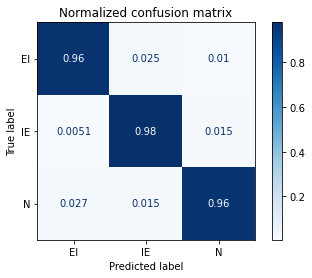

In [19]:
bmodel = BernoulliNB(alpha=0.1).fit(X=X_train_selected, y=y_train) # fit model to training with best hyperparameters

from sklearn.metrics import confusion_matrix # import confusion matrix
from sklearn.metrics import classification_report # import classification report
from sklearn.metrics import plot_confusion_matrix # import plotting of confusion matrices

predicted = bmodel.predict(X=X_test_selected) # creates predictions on testing set

class_report = classification_report(y_true=y_test, y_pred=predicted) # creates classification report
print(class_report) # reports precision, recall, f1-score and support as well as accuracies

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(bmodel, X_test_selected, y_test, 
                             display_labels=['EI', 'IE', 'N'], # labels
                             cmap=plt.cm.Blues, # color
                             normalize='true') # normalize plot to aid readability
disp.ax_.set_title("Normalized confusion matrix") # add axis title
print("Un-normalized Confusion Matrix") # organize results
confusion = confusion_matrix(y_true=y_test, y_pred=predicted) # create confusion matrix (unnormalized)
print(confusion) # print confusion matrix (unnormalized)
print("\nNormalized Confusion Matrix") 
print(disp.confusion_matrix) # show confusion matrix
plt.show() # show plot

#### Interpreting Results

The output of the previous cell provides more insight onto the performance of the Bernoulli Naive Bayes algorithm. The classification report showcases that the model evaluated on the test set had a high proportion of correctly predicted positive classes to all positive classes as evidenced by the high recall. The high precision score indicated a high proportion of correctly predicted positive classes out of all the positive predictions. In addition, a high F1 score with a weighted average for all three classes of 0.97 evidences a strong balance between precision and recall and a good performance by the model overall. As evidenced by the plot of the normalized confusion matrix, the model was very successful in minimizing false positives and false negatives as well as minimizing incorrect classifications without sacrificing too much accuracy.

Overall, the results are very promising.

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION

The machine learning algorithms used were k-Nearest Neighbors, Support Vector Machine, Guassian Naive Bayes, Decision Tree, Binomial Naive Bayes, and Multinomial Naive Bayes. The support vector machine algorithm was chosen due to its strength as an algorithm to predict high dimensional data. The Multinomial Naive Bayes algorithm was chosen since it is optimized for discrete datasets such as ours. The Binomial Naive Bayes algorithm was chosen for a similar reason as the algorithm performs well on discrete data and more specifically binary data. While the majority of our features are not binary (A, C, T, or G), they were predicted to function similar to binary features once one-hot-encoding is used. Due to this reason, the Binomial Naive Bayes was included. The other used algorithms, including the K-Nearest Neighbors, Guassian Naive Bayes, and Decision Tree algorithms were not as suited for our dataset however were included as well due to the low computational cost of doing so. Finding the algorithm with the best performance was prioritized over the neglible computational cost of testing these additional algorithms even though the chance of their success was relatively lower than the other algorithms.

Grid search with cross validation was used on all models with all relevant hyper parameters in order to ensure the most optimal model and hyperparameters were identified. The results of grid search are shown below:

 **K-Nearest Neighbor:**
Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 9},
Best cross-validation score:  0.8511645746164576

 **Support Vector Machine:**
Best Parameters:  {'C': 1, 'max_iter': 10000},
Best cross-validation score:  0.9615394002789401

 **Gaussian Naive Bayes:**
Best Parameters:  {'var_smoothing': 1e-07},
Best cross-validation score:  0.93268479776848

 **Decision Tree:**
Best Parameters:  {'max_depth': 10},
Best cross-validation score:  0.9410547419804743

 **Bernoulli Naive Bayes:**
Best Parameters:  {'alpha': 0.1},
Best cross-validation score:  0.961952580195258

 **Multinomial Naive Bayes:**
Best Parameters:  {'alpha': 0.1},
Best cross-validation score:  0.9632043235704323

Each algorithm was then run through cross fold validation with the optimal parameters found using grid search. The algorithms with the best general performances were the Support Vector Machine (C=1, max_iter= 10000) with a mean accuracy of 96.15%, the Multinomial Naive Bayes (alpha=0.1) with a mean accuracy of 96.20%, and the Binomial Naive Bayes (alpha=0.1) with a mean accuracy of 96.32%. These results match our hypothesis to the first question of the report. While all three of these algorithms had accuracies above 96%, the Binomial Naive Bayes performed the best and had a standard deviation of 0.83%. Due to this high performance, the Binomial Naive Bayes algorithm was tested using the testing set. The normalized confusion matrix shown in section 3.6 shows a very high accuracy and a low amount of false negatives / false positives indicating that there was minimized overfitting and underfitting.

Based on these results, the Binomial Naive Bayes algorithm should be used for our predictive model. The features in our dataset can be used in order to predict the type of splice-junction in a given genetic sequence. The high accuracy of the trained model showcases that the nucleotide bases in a genetic sequence (especially those close to the center as shown by our third plot) as well as the GC content of a sequence provide valuable information that a supervised classification algorithm can use to predict the type of splice-junction in a sequence.

#### Results of Hypothesis Tests

**1st Hypothesis Result** Our hypothesis that the Support Vector Machine, Multinomial Naive Bayes, and Binomial Naive Bayes algorithms would perform the best was supported by the final hyperparameter tuned model mean accuracies of 96.15%, 96.32%, and 96.2% for each respective model. The Binomial Naive Bayes algorithm performed the best with a weighted average F1 score of 0.97 on the testing set further answering the question of which machine learning model would perform the most optimally in classifying splice junctions in genetic sequences.


**2nd Hypothesis Result** A non-parametric ANOVA with post-hoc comparisons revealed that all three sequence types had significantly different GC contents, with exon-intron sequences having the highest, followed by intron-exon sequences and lastly non-spice sequences. GC-content is a characteristic feature of a DNA sequence. The presences of differences in GC content indicates that GC content can serve as a diagnostic feature in predicting sequence type. Higher GC content also has structural implications for a DNA or RNA molecule, as G-C pairs are stronger than A-T pairs. This may indicate structure differences in splice sites compared to non-splice sites that the cell is able to recognize and interact with to correctly splice mRNA molecules.


**3rd Hypothesis Result** The nucleotide bases in the middle of the sequence were selected at higher rates than those at the edges, aligning with our hypothesis. This finding is unsurprising though as the dataset was made to have the splice junctions in the middle, making them inherently important for identifying junctions. This can be seen in Figure 3. An interesting finding is that the bases leading up to the middle were more important than those following it. This can be seen with bases -12 to 8 being selected and very few selected out side this range. The lack of quantifiability to this hypothesis does not discredit the results as much as it proves the need for more analysis. It would be very interesting to do a more thorough analysis on codons as well as bases in the important regions to look for more patterns.



#### Conclusion and Future Work

The results of this analysis allowed the succesful answering of all our research questions. Out of the supervised classification algorithms used, the Binomial Naive Bayes algorithm performed the best with a mean accuracy of 96.32% in training and a weighted average F1 score of 0.97. Additionally, a significant difference was found in GC content between the types of splice junctions using a Kruskal Wallis test with p<0.0001. Another finding was that nucleotide bases at positions closer to the splice junction were found more important to the training of a supervised classification algorithm as evidenced by Figure 3.

While the results of the models are promising, there are still some things that might produce even more interesting results. The first thing we could do is obtain more data to potentially increase the accuracy of the model. It would be especially interesting to see how this model can transfer to genes of non-primates. We also believe that more insights can be derived if an n-gram-like protocol is employed. Genes are transcribed into amino acids in groups of 3 bases called codons. Grouping the bases into n-grams of size 3 will allow for the recognition of specific amino acids that may be linked to splice junctions. This would be especially useful when identifying the beginning and end of genes. These insights, combined with the patterns discovered already with specific bases will allow for greater accuracy in predicting splice junctions.

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS

**Introduction**
    Charles completed the problem statement, and significance of the problem. Questions, hypotheses and justifications for those hypotheses were worked on as a group.
    
**Data Aquisition** 
    This section was completed primarily as a group and Zach created the GitHub to load our dataset from.
    
**Data Analysis**
    This section was completed by Giona.
    
**Data Wrangling**
    This section was completed as a group.
    
**Data Exploration (plots)**
    The first plot (stacked bar chart) was created by Charles. The rest of the plots were created by Zach. Zach also embedded the plotly images into the notebook from GitHub.
    
**Model Construction Evaluation and Testing**
    This section was completed as a group.
    
**Discussion and Hypothesis Tests**
    The discussion was completed as a group. Our first hypothesis and analysis of the findings from 3.4, 3.5, and 3.6 were evaluated by Giona, our second hypothesis was tested and evaluated by Charles, and our third hypothesis was evaluated by Zach. Zach also completed the future works section of the discussion.